Подбор гиперпараметров


In [10]:
"""

Рост числа супермаркетов в большинстве населенных городов увеличивается, и конкуренция на рынке также высока.
Набор данных представляет собой один из исторических данных о продажах компании-супермаркета, который был зарегистрирован в 3 различных филиалах за 3 месяца.

Поскольку данные исторические и имеют временную зависимость, в работе необходимо учесть порядок записей и при разбиении на трейн и тест следить за тем, чтобы данные в тесте были дальше на временном отрезке
"""

'\n\nРост числа супермаркетов в большинстве населенных городов увеличивается, и конкуренция на рынке также высока.\nНабор данных представляет собой один из исторических данных о продажах компании-супермаркета, который был зарегистрирован в 3 различных филиалах за 3 месяца.\n\nПоскольку данные исторические и имеют временную зависимость, в работе необходимо учесть порядок записей и при разбиении на трейн и тест следить за тем, чтобы данные в тесте были дальше на временном отрезке\n'

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix

In [12]:
features=pd.read_csv("features.csv")
store=pd.read_csv("stores.csv")
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [13]:
train=train.groupby(['Store','Date'])['Weekly_Sales'].sum()
train=train.reset_index()
data=pd.merge(train,features,on=['Store','Date'],how='inner')
data=pd.merge(data,store,on=['Store'],how='inner')
data.head(10)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,1643690.90,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,1641957.44,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,1611968.17,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,1409727.59,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,1554806.68,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315
5,1,2010-03-12,1439541.59,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False,A,151315
6,1,2010-03-19,1472515.79,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False,A,151315
7,1,2010-03-26,1404429.92,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False,A,151315
8,1,2010-04-02,1594968.28,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False,A,151315
9,1,2010-04-09,1545418.53,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False,A,151315


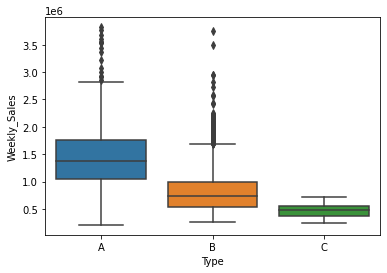

In [14]:
sns.boxplot(x='Type',y='Weekly_Sales',data=data)

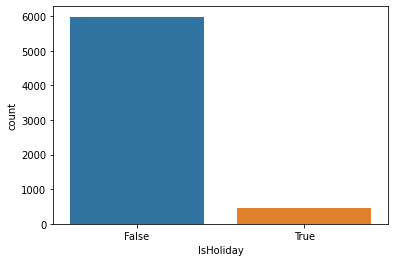

In [15]:
sns.countplot(x="IsHoliday", data=data)

In [16]:
data.isnull().sum()

Store              0
Date               0
Weekly_Sales       0
Temperature        0
Fuel_Price         0
MarkDown1       4155
MarkDown2       4798
MarkDown3       4389
MarkDown4       4470
MarkDown5       4140
CPI                0
Unemployment       0
IsHoliday          0
Type               0
Size               0
dtype: int64

In [17]:
"""
Признаки 'MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5' имеют большое кол-во пропусков, не совсем понятно, как их заполнять.
Использовать их не представляется возможным, поэтому придется удалить.
"""

data=data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1)

In [18]:
data['Holiday']=[int(i) for i in list(data.IsHoliday)]

In [19]:
Type_dummy=pd.get_dummies(data['Type'],drop_first=True)
data=pd.concat([data,Type_dummy],axis=1)
data=data.drop(['Type','IsHoliday'],axis=1)

In [20]:
"""
Как уже было сказано, данные имеют временную зависимость, для учета этой особенности мы отсортируем по времени наш набор таким образом, чтобы последние данные были в конце
и далее при использовании TrainTestSplit не будем смешивать данные, разделим ровно как есть чтобы не нарушить хронологию.
"""

'\nКак уже было сказано, данные имеют временную зависимость, для учета этой особенности мы отсортируем по времени наш набор таким образом, чтобы последние данные были в конце\nи далее при использовании TrainTestSplit не будем смешивать данные, разделим ровно как есть чтобы не нарушить хронологию.\n'

In [21]:
data = data.sort_values(by = 'Date')
print(data)

      Store        Date  Weekly_Sales  Temperature  Fuel_Price         CPI  \
0         1  2010-02-05    1643690.90        42.31       2.572  211.096358   
1287     10  2010-02-05    2193048.75        54.34       2.962  126.442065   
5148     37  2010-02-05     536006.73        45.97       2.572  209.852966   
2288     17  2010-02-05     789036.02        23.11       2.666  126.442065   
4147     30  2010-02-05     465108.52        39.05       2.572  210.752605   
...     ...         ...           ...          ...         ...         ...   
3574     25  2012-10-26     688940.94        56.69       3.882  216.151590   
714       5  2012-10-26     319550.77        71.70       3.506  224.037814   
5719     40  2012-10-26     921264.52        49.65       3.917  138.728161   
2573     18  2012-10-26    1127516.25        56.09       3.917  138.728161   
6434     45  2012-10-26     760281.43        58.85       3.882  192.308899   

      Unemployment    Size  Holiday  B  C  
0            8.106 

In [22]:
X=data.drop(['Weekly_Sales','Store','Date'],axis=1)
y=data['Weekly_Sales']

In [23]:
nom_cols=[8]

scale_cols=[0,3]

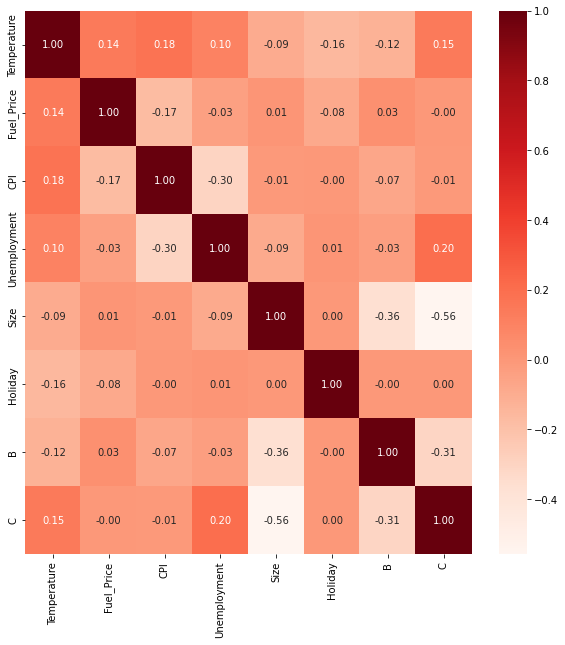

In [24]:
fig = plt.figure(figsize=(10,10))
fig.patch.set_facecolor('white')
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds,fmt='.2f')

In [25]:
"""
Как видно по матрице корреляций, прямых зависимостей в данных нет, соответственно мультиколлинеарность не повлияет на результаты работы моделей.

"""

'\nКак видно по матрице корреляций, прямых зависимостей в данных нет, соответственно мультиколлинеарность не повлияет на результаты работы моделей.\n\n'

In [26]:
transf = make_column_transformer((OneHotEncoder(sparse=False,drop='first'), nom_cols),
                                 (StandardScaler(), scale_cols),
                                 remainder='passthrough')
transf

lab = LabelEncoder()
y = lab.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

Для эффективной работы моделей, в ходе экспериментов были подобраные оптимальные гиперпараметры, которые будут использованы при подсчете финальных метрик на тестовой выборке. 

In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report

knn_c = KNeighborsRegressor(n_neighbors=14, algorithm="kd_tree", metric="minkowski")
knn_c.fit(x_train, y_train)
y_pred_knn=knn_c.predict(x_test)
acc_knn= round(knn_c.score(x_test, y_test) * 100, 2)
print ("Coefficient of determination: %i %% \n"%acc_knn)


Coefficient of determination: 96 % 



In [28]:
from sklearn.ensemble import RandomForestRegressor
clf_rf = RandomForestRegressor(n_estimators=150, criterion = "squared_error", random_state = 42)
clf_rf.fit(x_train, y_train)
y_pred_rf=clf_rf.predict(x_test)
acc_rf= round(clf_rf.score(x_test, y_test) * 100, 2)
print ("Coefficient of determination: %i %% \n"%acc_rf)

Coefficient of determination: 96 % 



In [29]:
"""
Общие выводы:
Задача хорошо подходит для регрессии - при определенной предобработке можно достичь хороших значений в точности
при том, что некоторые неудобства доставляет формат хранения и большое количество пропущенных значений для некоторых
признаков. Из всех испытанных методов (SVR, Linear Regression, KNN, RandomForestRegressor), наилучший результат показали алгоритмы Случайный Лес и КНН (были приведены в качестве примера в отчете).
"""


'\nОбщие выводы:\nЗадача хорошо подходит для регрессии - при определенной предобработке можно достичь хороших значений в точности\nпри том, что некоторые неудобства доставляет формат хранения и большое количество пропущенных значений для некоторых\nпризнаков. Из всех испытанных методов (SVR, Linear Regression, KNN, RandomForestRegressor), наилучший результат показали алгоритмы Случайный Лес и КНН (были приведены в качестве примера в отчете).\n'